In [2]:
!pip install seaborn

In [3]:
!pip install mlxtend

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [5]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

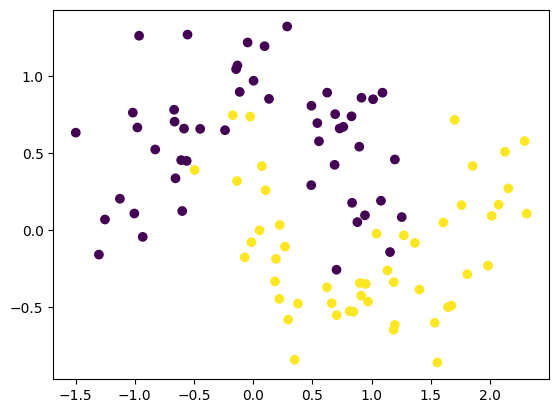

In [6]:
x,y = make_moons(100, noise=0.25, random_state=2)
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

In [7]:
model1 = Sequential()
model1.add(Dense(128, input_dim=2, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(1,activation='sigmoid'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [9]:
history1 = model1.fit(x,y, epochs=2000, validation_split=0.2, verbose=0)

9600/9600 [==============================] - 14s 1ms/step


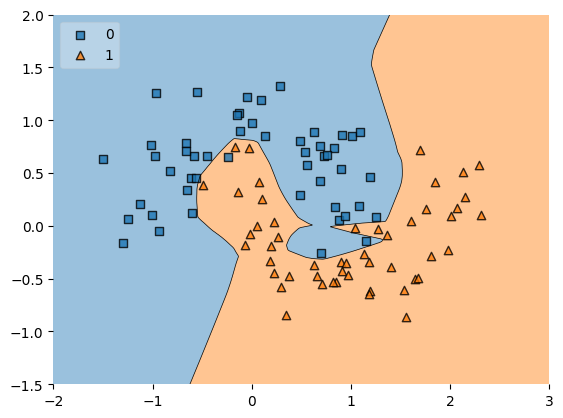

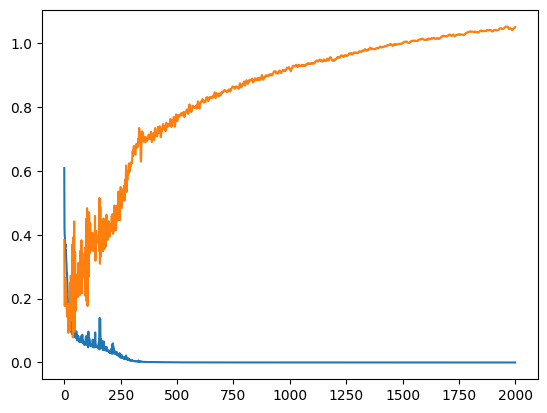

In [10]:
plot_decision_regions(x,y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5, 2)
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [12]:
model2 = Sequential()
model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128,activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
adam = Adam(learning_rate=0.01)
model2.compile(loss = 'binary_crossentropy', optimizer=adam, metrics=['accuracy'])


In [14]:
history2 = model2.fit(x,y, epochs=2000, validation_split=0.2, verbose=0)

9600/9600 [==============================] - 14s 1ms/step


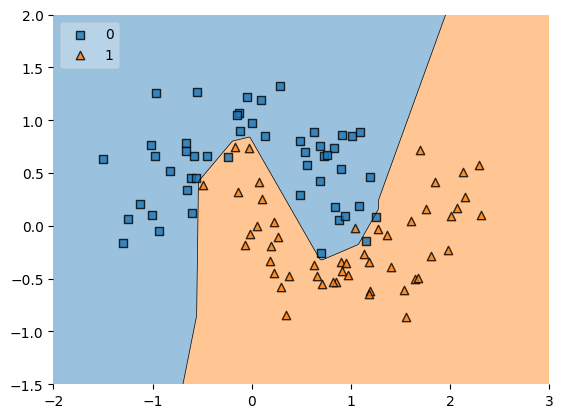

In [15]:
plot_decision_regions(x,y.astype('int'),clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

Accuracy For Model 1: 100.00%
Accuracy For Model 2: 96.25%


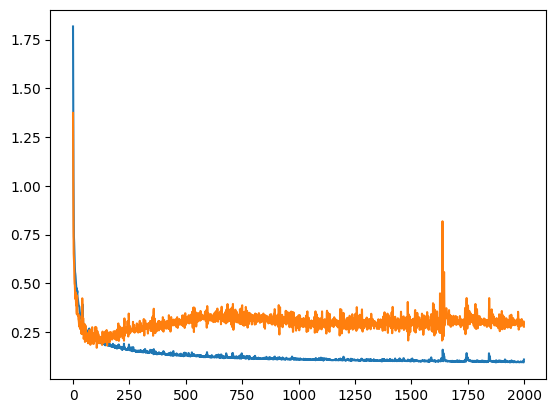

In [16]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
acc_model1=history1.history['accuracy'][-1]*100
acc_model2=history2.history['accuracy'][-1]*100

print(f'Accuracy For Model 1: {acc_model1:.2f}%')
print(f'Accuracy For Model 2: {acc_model2:.2f}%')

